In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [6]:
# Load the dataset
data = pd.read_csv('train.csv/train.csv')

In [7]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
# Create a word cloud
toxic_wordcloud = WordCloud(background_color='white').generate(' '.join(data['comment_text']))


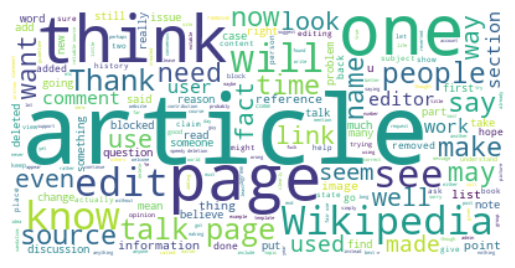

In [9]:
# Plot the word cloud
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

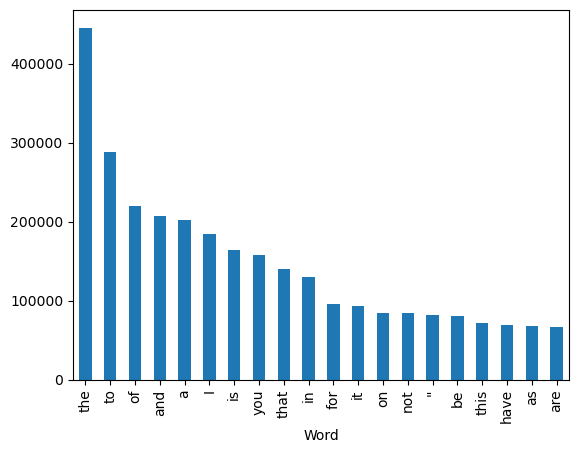

In [10]:
# Create a bar chart of top 20 most frequent words
toxic_words = Counter(' '.join(data['comment_text']).split()).most_common(20)
toxic_word_df = pd.DataFrame(toxic_words, columns=['Word', 'Frequency'])
toxic_word_df.plot(kind='bar', x='Word', y='Frequency', legend=None)
plt.show()

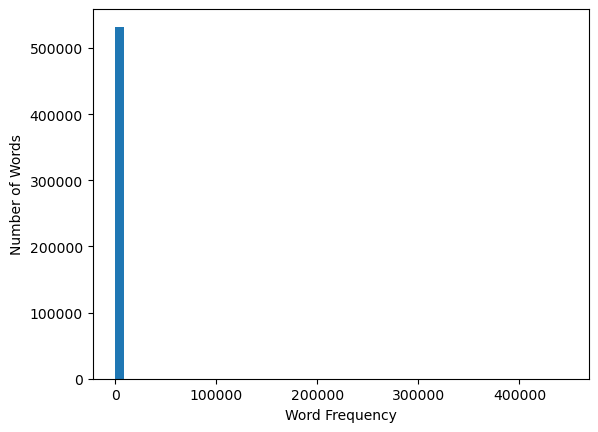

In [11]:
# Create a histogram of word frequencies
toxic_word_freq = Counter(' '.join(data['comment_text']).split()).values()
plt.hist(list(toxic_word_freq), bins=50)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.show()

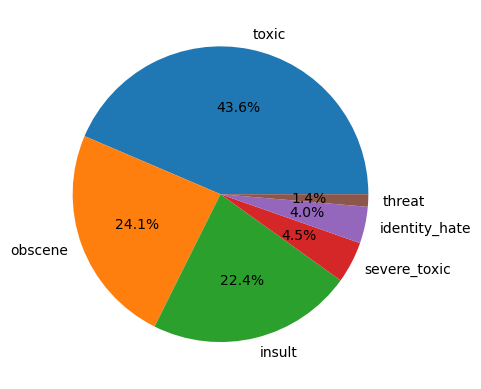

In [13]:
# Create a pie chart of comment labels
toxic_labels =  data.iloc[:, 2:].sum().sort_values(ascending=False)
toxic_labels.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [15]:
label_count = data[data.columns[2:]].sum()
label_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

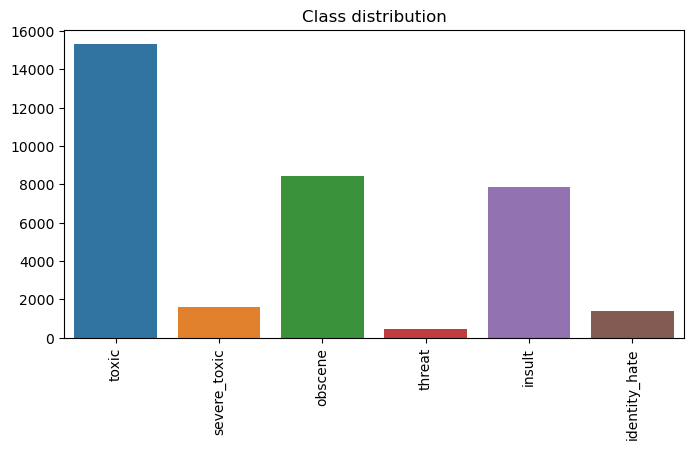

In [20]:
#Class Distribution
plt.figure(figsize=(8,4))
sns.barplot(x= label_count.index, y = label_count.values)
plt.xticks(rotation=90)
plt.title('Class distribution', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of comment Lengths')

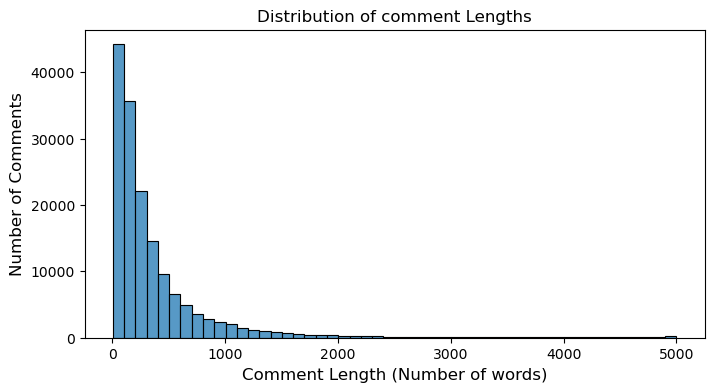

In [24]:
comment_len = data.comment_text.str.len()

# plot the distribution of comment lengths
plt.figure(figsize=(8,4))
sns.histplot(comment_len, kde=False, bins=50)
plt.xlabel("Comment Length (Number of words)", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.title("Distribution of comment Lengths", fontsize=12)

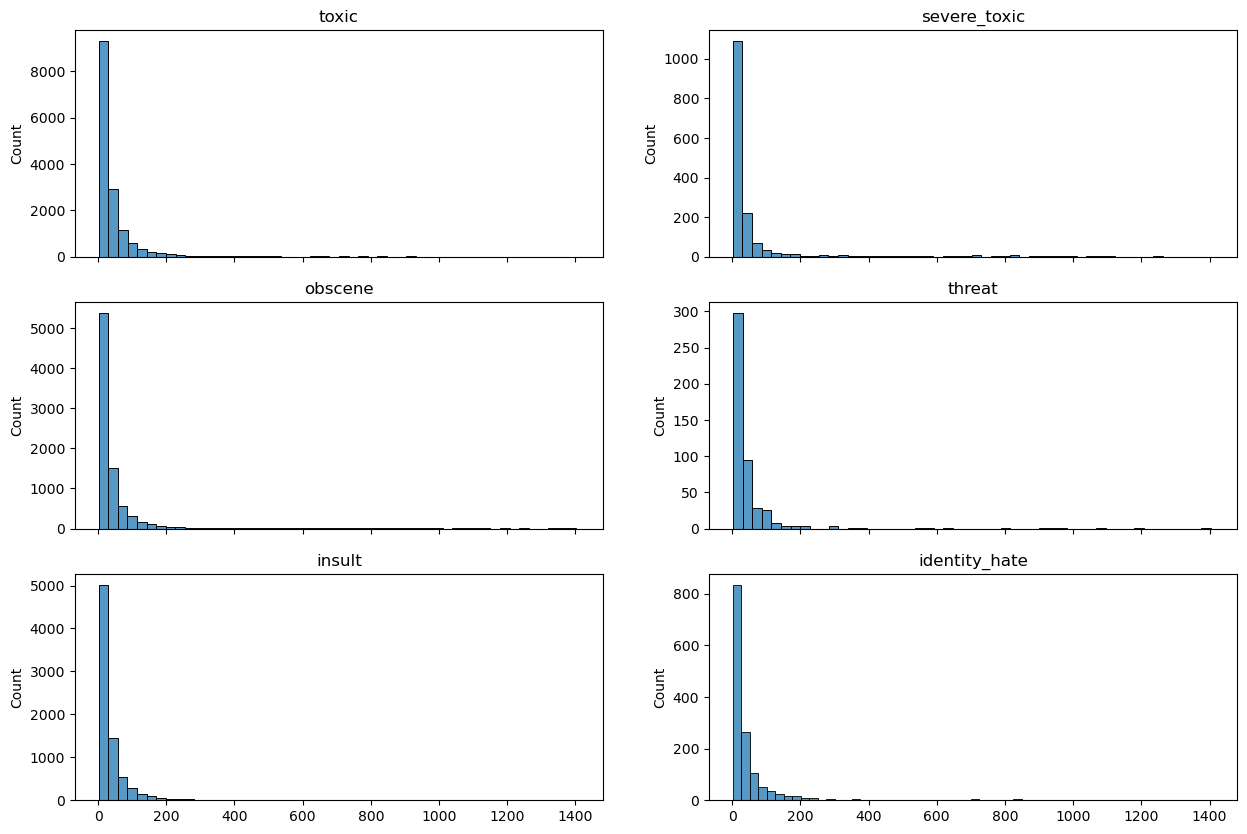

In [23]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10), sharex=True)
axes =ax.ravel()

for i in range(6):
    comments = data.loc[data[labels[i]] == 1, :]
    comment_len = [len(comment.split()) for comment in comments["comment_text"]]
    sns.histplot(comment_len, ax=axes[i], bins = 50)
    axes[i].title.set_text(labels[i])